# Load Dataset

In [1]:
import pandas as pd

df = pd.read_csv("data/kepler_exoplanets.csv")
df.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


# Comprehensive Exploratory Data Analysis
## Kepler Exoplanet Detection Dataset

This dataset contains **9,564 Kepler Objects of Interest (KOIs)** with **50 features** including:
- **Target Variable**: `koi_disposition` (CONFIRMED, FALSE POSITIVE, CANDIDATE)
- **Orbital Parameters**: period, radius, semi-major axis, inclination, eccentricity
- **Stellar Properties**: effective temperature, surface gravity, stellar radius
- **Detection Metrics**: transit depth, duration, signal-to-noise ratio

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("DATASET OVERVIEW")
print(f"Shape: {df.shape}")
print(f"Total KOIs: {len(df):,}")
print(f"Features: {df.shape[1]}")
print("\nColumn names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

DATASET OVERVIEW
Shape: (9564, 50)
Total KOIs: 9,564
Features: 50

Column names:
 1. rowid
 2. kepid
 3. kepoi_name
 4. kepler_name
 5. koi_disposition
 6. koi_pdisposition
 7. koi_score
 8. koi_fpflag_nt
 9. koi_fpflag_ss
10. koi_fpflag_co
11. koi_fpflag_ec
12. koi_period
13. koi_period_err1
14. koi_period_err2
15. koi_time0bk
16. koi_time0bk_err1
17. koi_time0bk_err2
18. koi_impact
19. koi_impact_err1
20. koi_impact_err2
21. koi_duration
22. koi_duration_err1
23. koi_duration_err2
24. koi_depth
25. koi_depth_err1
26. koi_depth_err2
27. koi_prad
28. koi_prad_err1
29. koi_prad_err2
30. koi_teq
31. koi_teq_err1
32. koi_teq_err2
33. koi_insol
34. koi_insol_err1
35. koi_insol_err2
36. koi_model_snr
37. koi_tce_plnt_num
38. koi_tce_delivname
39. koi_steff
40. koi_steff_err1
41. koi_steff_err2
42. koi_slogg
43. koi_slogg_err1
44. koi_slogg_err2
45. koi_srad
46. koi_srad_err1
47. koi_srad_err2
48. ra
49. dec
50. koi_kepmag


## Target Variable Analysis

KOI DISPOSITION DISTRIBUTION:
koi_disposition
FALSE POSITIVE    5023
CONFIRMED         2293
CANDIDATE         2248
Name: count, dtype: int64

Percentages:
koi_disposition
FALSE POSITIVE    52.52
CONFIRMED         23.98
CANDIDATE         23.50
Name: count, dtype: float64


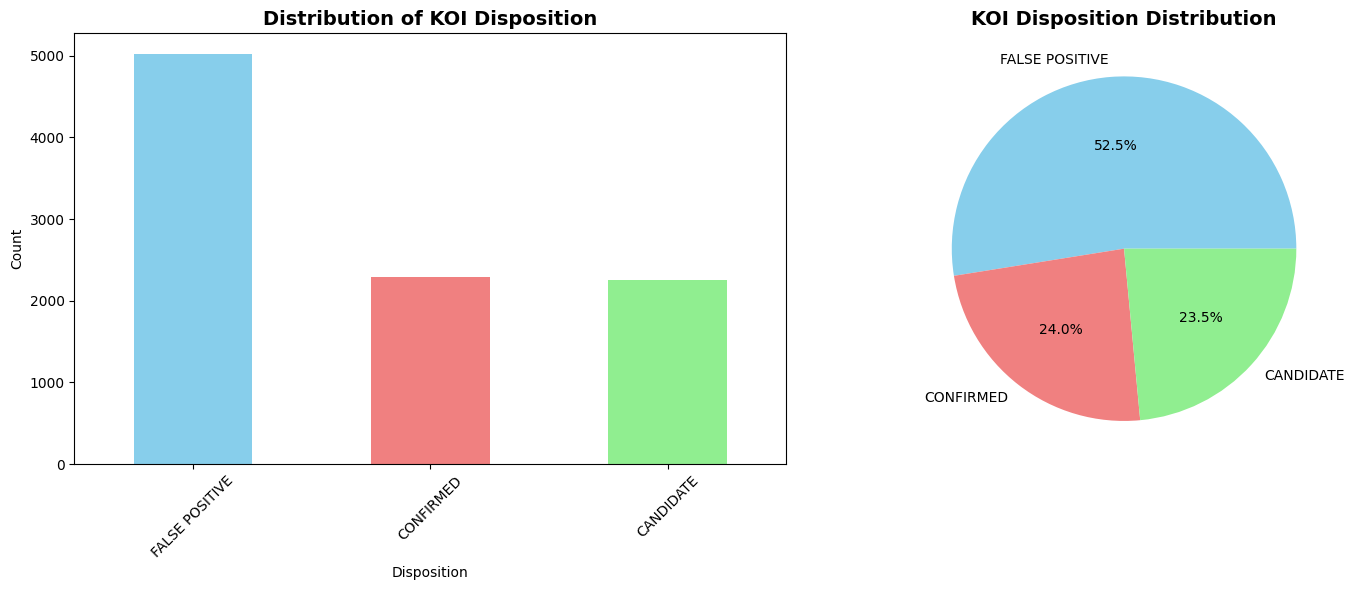


CLASS BALANCE:
Confirmed Exoplanets: 2,293 (24.0%)
False Positives: 5,023 (52.5%)
Candidates: 2,248 (23.5%)


In [3]:
# Analyze target variable distribution
print("KOI DISPOSITION DISTRIBUTION:")
disposition_counts = df['koi_disposition'].value_counts()
print(disposition_counts)
print("\nPercentages:")
print((disposition_counts / len(df) * 100).round(2))

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot
disposition_counts.plot(kind='bar', ax=axes[0], color=['skyblue', 'lightcoral', 'lightgreen'])
axes[0].set_title('Distribution of KOI Disposition', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Disposition')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Pie chart
axes[1].pie(disposition_counts.values, labels=disposition_counts.index, autopct='%1.1f%%', 
           colors=['skyblue', 'lightcoral', 'lightgreen'])
axes[1].set_title('KOI Disposition Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Class balance analysis
confirmed = disposition_counts.get('CONFIRMED', 0)
false_positive = disposition_counts.get('FALSE POSITIVE', 0)
candidate = disposition_counts.get('CANDIDATE', 0)

print("\nCLASS BALANCE:")
print(f"Confirmed Exoplanets: {confirmed:,} ({confirmed/len(df)*100:.1f}%)")
print(f"False Positives: {false_positive:,} ({false_positive/len(df)*100:.1f}%)")
print(f"Candidates: {candidate:,} ({candidate/len(df)*100:.1f}%)")

## Missing Data Analysis

COLUMNS WITH MISSING DATA (36 out of 50):
                Missing Count  Missing Percentage
koi_teq_err2             9564          100.000000
koi_teq_err1             9564          100.000000
kepler_name              7270           76.014220
koi_score                1510           15.788373
koi_steff_err2            483            5.050188
koi_srad_err2             468            4.893350
koi_srad_err1             468            4.893350
koi_steff_err1            468            4.893350
koi_slogg_err2            468            4.893350
koi_slogg_err1            468            4.893350


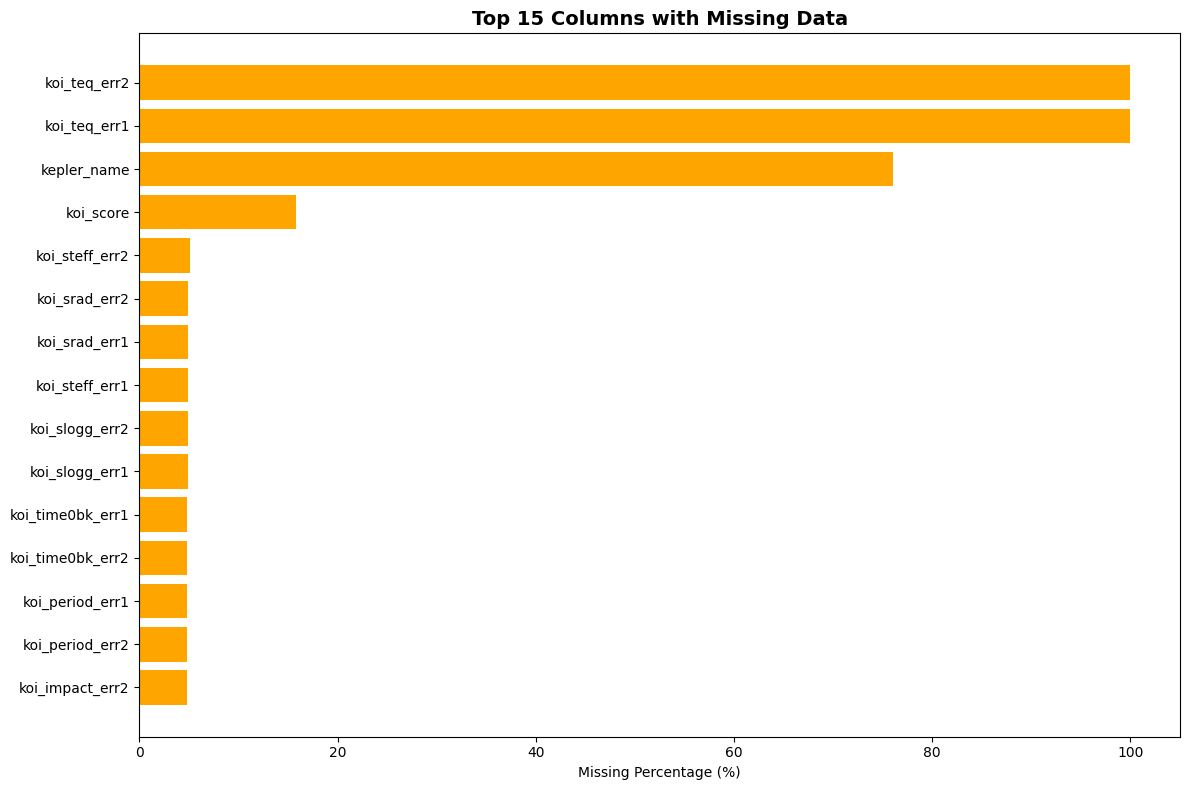


OVERALL DATA COMPLETENESS: 91.5%


In [4]:
# Missing data analysis
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
}).sort_values('Missing Percentage', ascending=False)

# Only show columns with missing data
missing_df = missing_df[missing_df['Missing Count'] > 0]

print(f"COLUMNS WITH MISSING DATA ({len(missing_df)} out of {len(df.columns)}):")
print(missing_df.head(10))

# Visualization
if len(missing_df) > 0:
    plt.figure(figsize=(12, 8))
    top_missing = missing_df.head(15)
    plt.barh(range(len(top_missing)), top_missing['Missing Percentage'], color='orange')
    plt.yticks(range(len(top_missing)), top_missing.index)
    plt.xlabel('Missing Percentage (%)')
    plt.title('Top 15 Columns with Missing Data', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

print(f"\nOVERALL DATA COMPLETENESS: {((df.size - df.isnull().sum().sum()) / df.size * 100):.1f}%")

## Key Features Analysis

In [5]:
# Define key features for exoplanet detection
key_features = {
    'Orbital Parameters': ['koi_period', 'koi_prad', 'koi_sma', 'koi_incl', 'koi_eccen'],
    'Transit Properties': ['koi_depth', 'koi_duration', 'koi_impact'],
    'Stellar Properties': ['koi_steff', 'koi_slogg', 'koi_srad', 'koi_kepmag'],
    'Detection Metrics': ['koi_score', 'koi_model_snr']
}

print("KEY FEATURES SUMMARY:")
for category, features in key_features.items():
    print(f"\n{category}:")
    for feature in features:
        if feature in df.columns:
            missing_pct = df[feature].isnull().sum() / len(df) * 100
            print(f"  • {feature}: {missing_pct:.1f}% missing")
        else:
            print(f"  • {feature}: NOT FOUND")

# Statistical summary of key numerical features
all_key_features = [f for features in key_features.values() for f in features if f in df.columns]
numerical_features = [f for f in all_key_features if df[f].dtype in ['float64', 'int64']]

print("\nSTATISTICAL SUMMARY:")
print(df[numerical_features].describe().round(3))

KEY FEATURES SUMMARY:

Orbital Parameters:
  • koi_period: 0.0% missing
  • koi_prad: 3.8% missing
  • koi_sma: NOT FOUND
  • koi_incl: NOT FOUND
  • koi_eccen: NOT FOUND

Transit Properties:
  • koi_depth: 3.8% missing
  • koi_duration: 0.0% missing
  • koi_impact: 3.8% missing

Stellar Properties:
  • koi_steff: 3.8% missing
  • koi_slogg: 3.8% missing
  • koi_srad: 3.8% missing
  • koi_kepmag: 0.0% missing

Detection Metrics:
  • koi_score: 15.8% missing
  • koi_model_snr: 3.8% missing

STATISTICAL SUMMARY:
       koi_period    koi_prad    koi_depth  koi_duration  koi_impact  \
count    9564.000    9201.000     9201.000      9564.000    9201.000   
mean       75.671     102.892    23791.336         5.622       0.735   
std      1334.744    3077.639    82242.683         6.472       3.349   
min         0.242       0.080        0.000         0.052       0.000   
25%         2.734       1.400      159.900         2.438       0.197   
50%         9.753       2.390      421.100         3

## Feature Distributions

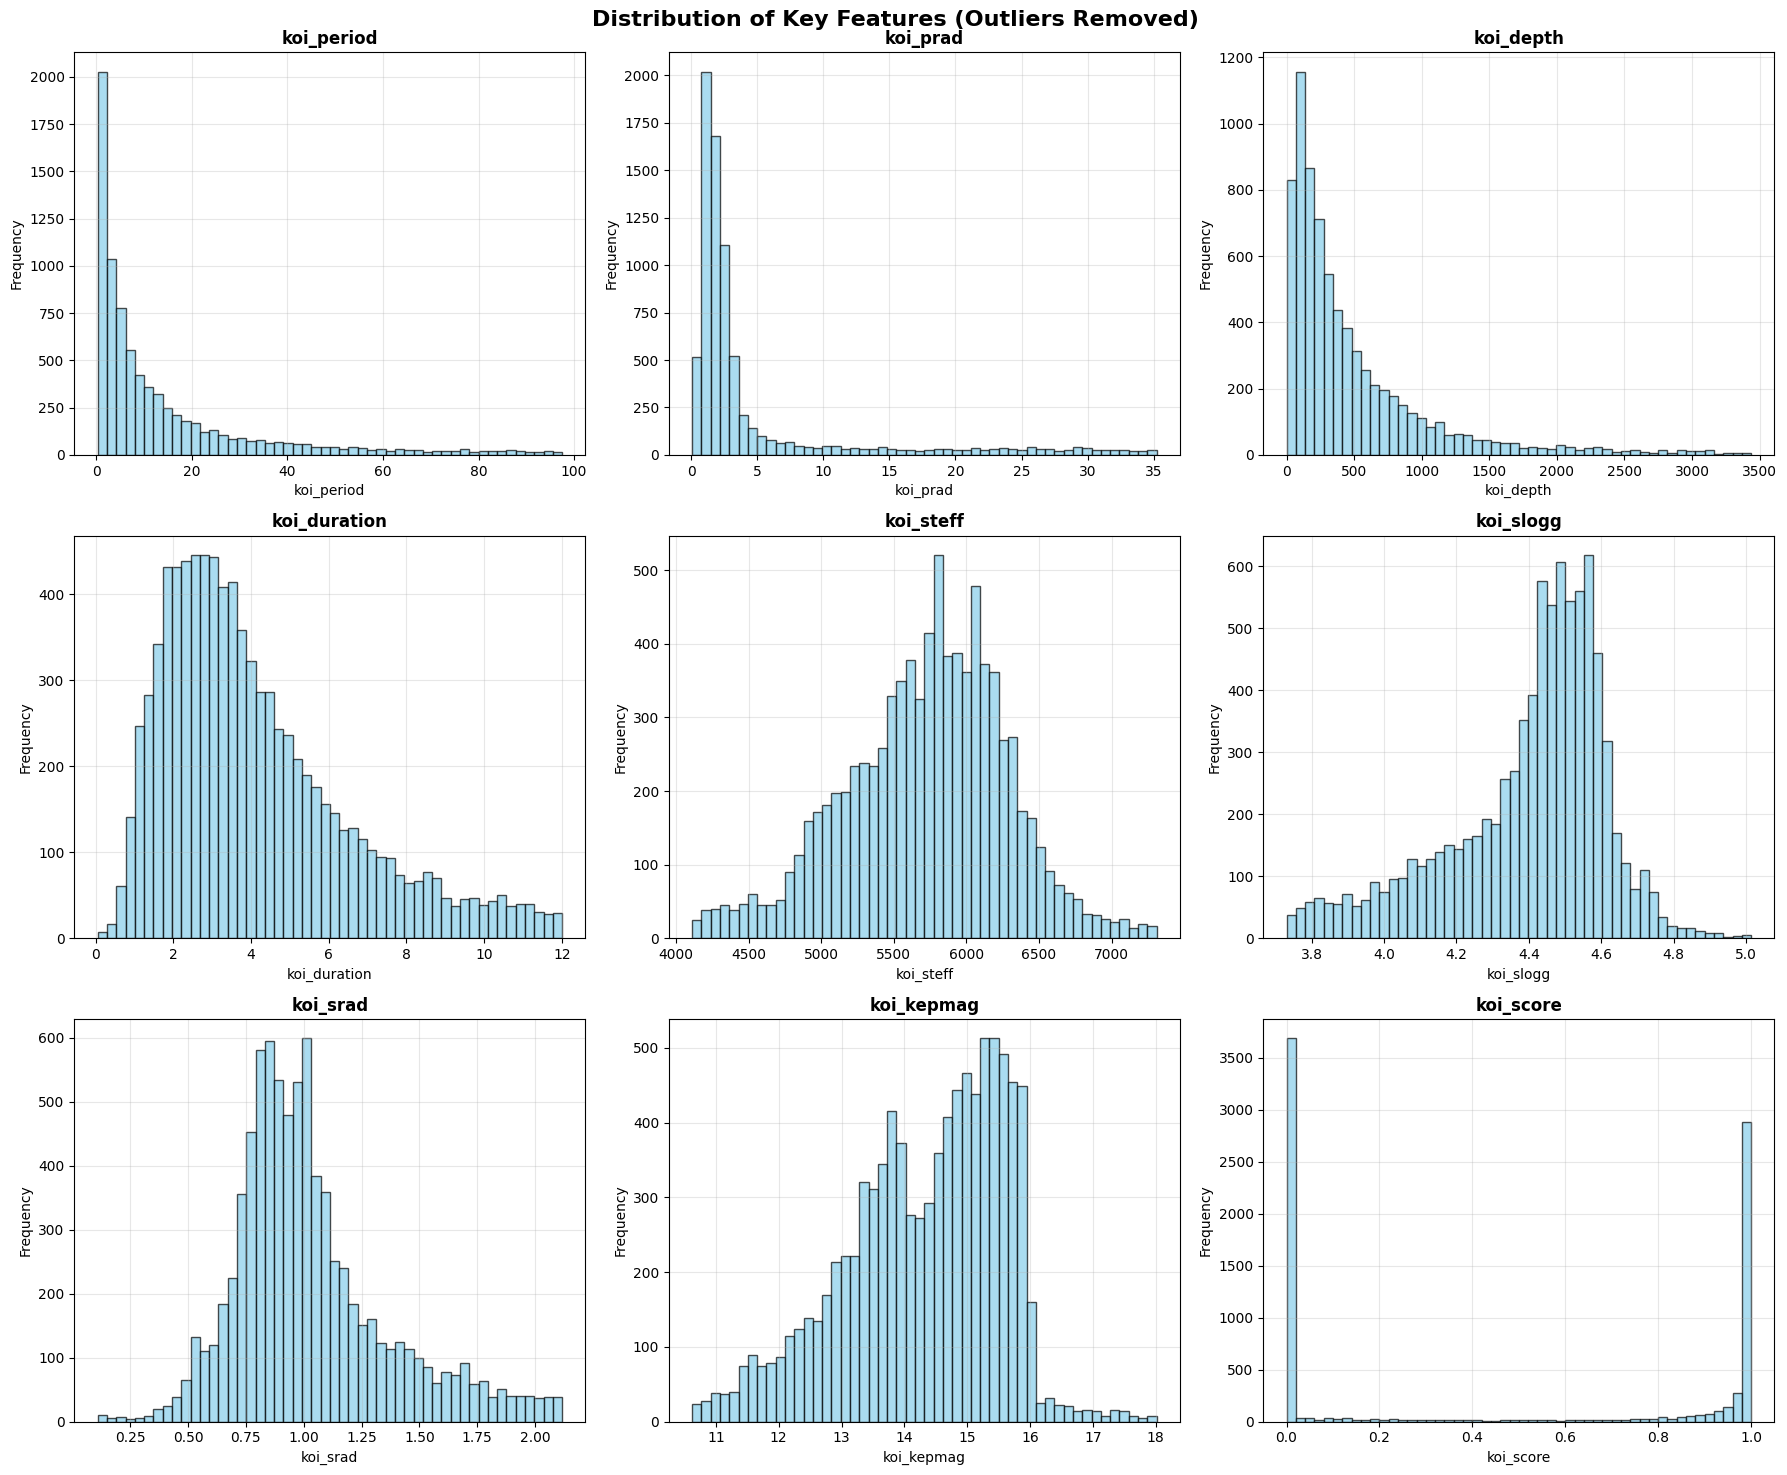

In [6]:
# Create distribution plots for key features
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

plot_features = ['koi_period', 'koi_prad', 'koi_depth', 'koi_duration', 
                'koi_steff', 'koi_slogg', 'koi_srad', 'koi_kepmag', 'koi_score']

for i, feature in enumerate(plot_features):
    if feature in df.columns and i < len(axes):
        # Remove extreme outliers for better visualization
        data = df[feature].dropna()
        if len(data) > 0:
            Q1 = data.quantile(0.25)
            Q3 = data.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
            
            axes[i].hist(filtered_data, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
            axes[i].set_title(f'{feature}', fontweight='bold')
            axes[i].set_xlabel(feature)
            axes[i].set_ylabel('Frequency')
            axes[i].grid(True, alpha=0.3)

plt.suptitle('Distribution of Key Features (Outliers Removed)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## Correlation Analysis

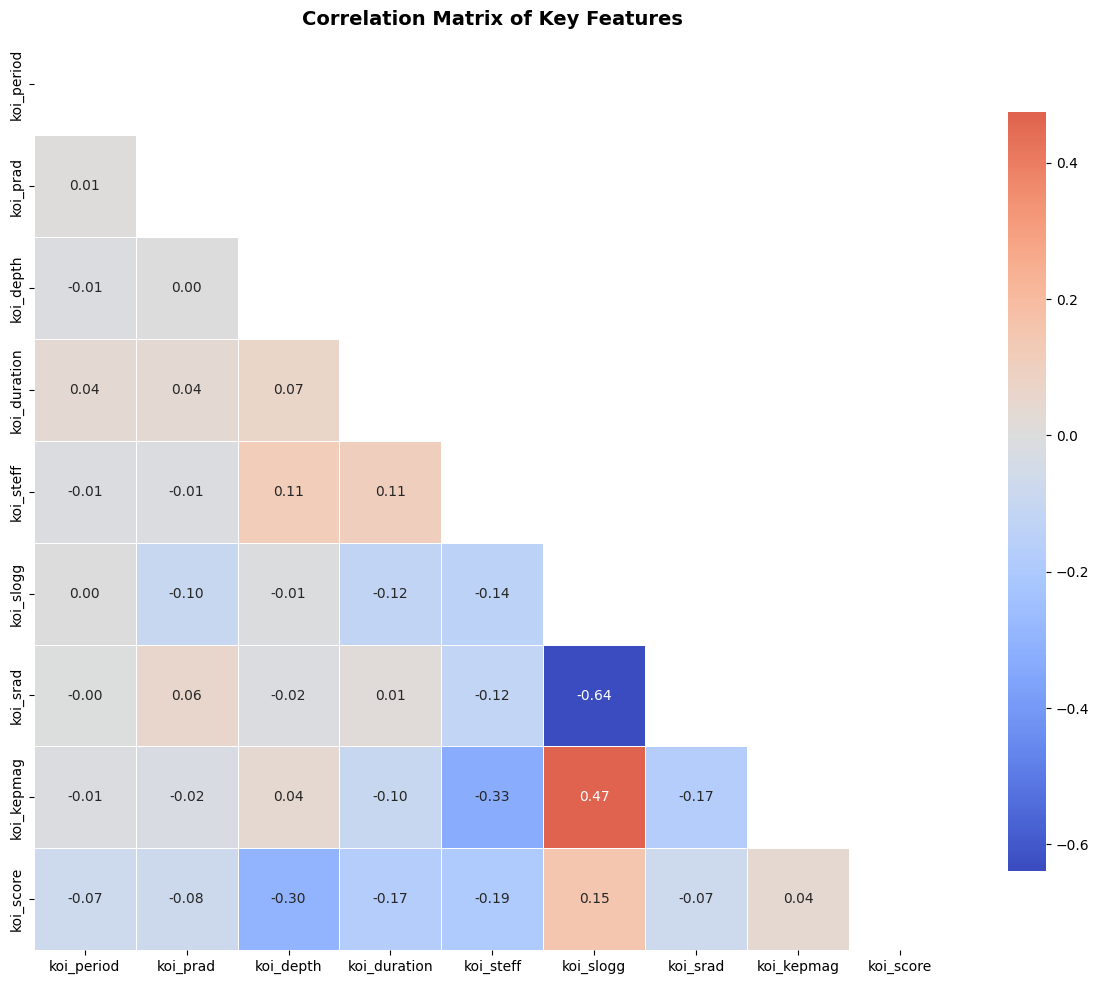

No high correlations (|r| > 0.7) found among key features


In [7]:
# Correlation analysis of key features
corr_features = ['koi_period', 'koi_prad', 'koi_depth', 'koi_duration', 
                'koi_steff', 'koi_slogg', 'koi_srad', 'koi_kepmag', 'koi_score']
corr_features = [f for f in corr_features if f in df.columns]

corr_matrix = df[corr_features].corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
           square=True, linewidths=0.5, cbar_kws={"shrink": .8}, fmt='.2f')
plt.title('Correlation Matrix of Key Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Find high correlations
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))

if high_corr_pairs:
    print("HIGH CORRELATIONS (|r| > 0.7):")
    for feat1, feat2, corr_val in high_corr_pairs:
        print(f"  {feat1} ↔ {feat2}: {corr_val:.3f}")
else:
    print("No high correlations (|r| > 0.7) found among key features")

## Features by Disposition

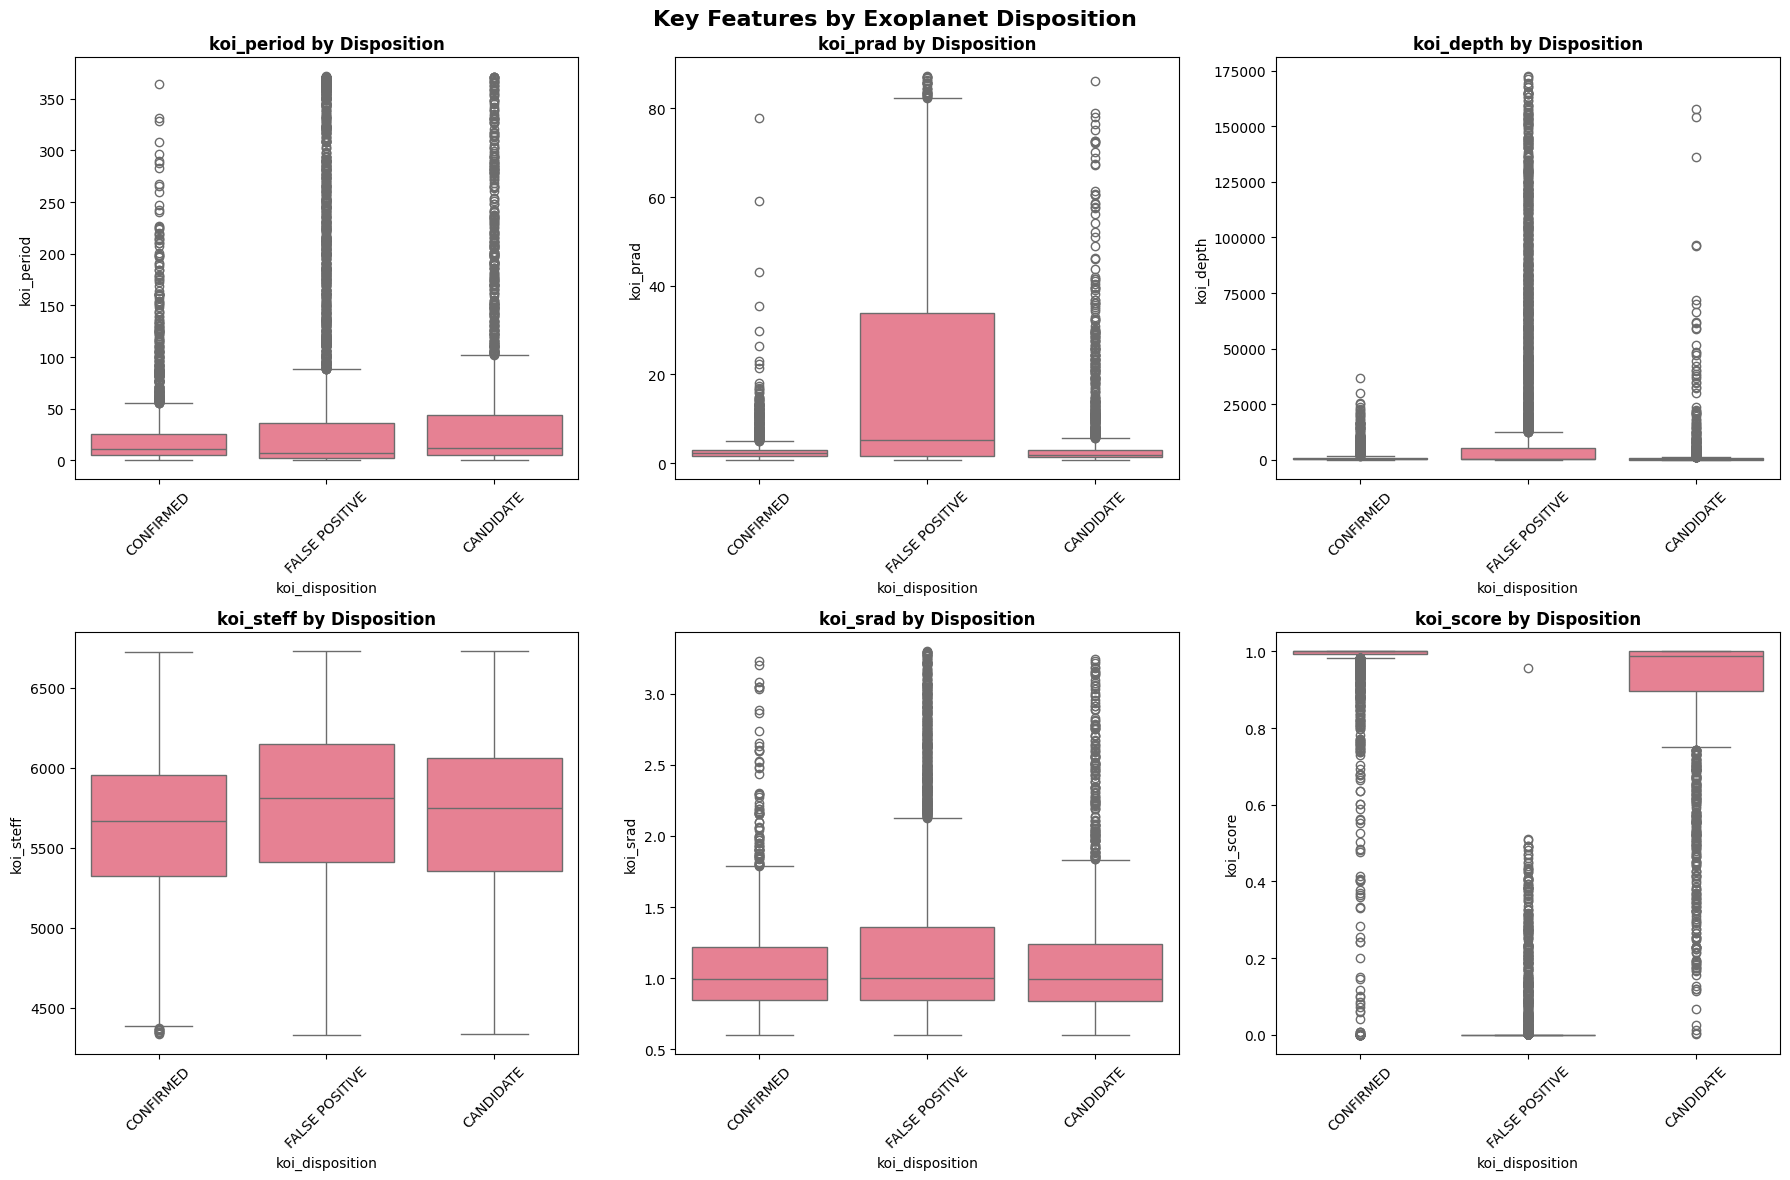

FEATURE STATISTICS BY DISPOSITION:

koi_period:
                 count     mean       std  median
koi_disposition                                  
CANDIDATE         2248  130.524  2744.156  13.279
CONFIRMED         2293   27.063    54.019  11.323
FALSE POSITIVE    5023   73.312   139.114   6.383

koi_prad:
                 count     mean       std  median
koi_disposition                                  
CANDIDATE         2185   15.931   316.937    1.78
CONFIRMED         2292    2.872     3.361    2.17
FALSE POSITIVE    4724  191.642  4288.087    6.85

koi_score:
                 count   mean    std  median
koi_disposition                             
CANDIDATE         1797  0.900  0.183   0.987
CONFIRMED         2281  0.963  0.144   1.000
FALSE POSITIVE    3976  0.015  0.062   0.000


In [8]:
# Analyze key features by disposition
main_dispositions = ['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE']
df_filtered = df[df['koi_disposition'].isin(main_dispositions)]

# Box plots for key features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

box_features = ['koi_period', 'koi_prad', 'koi_depth', 'koi_steff', 'koi_srad', 'koi_score']

for i, feature in enumerate(box_features):
    if feature in df.columns and i < len(axes):
        # Remove extreme outliers for better visualization
        data = df_filtered[feature].dropna()
        if len(data) > 0:
            Q1 = data.quantile(0.05)
            Q3 = data.quantile(0.95)
            
            plot_data = df_filtered[(df_filtered[feature] >= Q1) & (df_filtered[feature] <= Q3)]
            
            sns.boxplot(data=plot_data, x='koi_disposition', y=feature, ax=axes[i])
            axes[i].set_title(f'{feature} by Disposition', fontweight='bold')
            axes[i].tick_params(axis='x', rotation=45)

plt.suptitle('Key Features by Exoplanet Disposition', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Statistical comparison
print("FEATURE STATISTICS BY DISPOSITION:")
for feature in ['koi_period', 'koi_prad', 'koi_score']:
    if feature in df.columns:
        print(f"\n{feature}:")
        stats_by_disp = df_filtered.groupby('koi_disposition')[feature].agg(['count', 'mean', 'std', 'median'])
        print(stats_by_disp.round(3))

## Key Insights & Summary

In [9]:
print("="*60)
print("KEY INSIGHTS & SUMMARY")
print("="*60)

total_objects = len(df)
confirmed_planets = disposition_counts.get('CONFIRMED', 0)
false_positives = disposition_counts.get('FALSE POSITIVE', 0)
candidates = disposition_counts.get('CANDIDATE', 0)

print("\nDATASET SUMMARY:")
print(f"  • Total KOIs: {total_objects:,}")
print(f"  • Confirmed Exoplanets: {confirmed_planets:,} ({confirmed_planets/total_objects*100:.1f}%)")
print(f"  • False Positives: {false_positives:,} ({false_positives/total_objects*100:.1f}%)")
print(f"  • Candidates: {candidates:,} ({candidates/total_objects*100:.1f}%)")

print("\nDATA QUALITY:")
missing_cols = df.isnull().sum()
cols_with_missing = (missing_cols > 0).sum()
print(f"  • Columns with missing data: {cols_with_missing}/{len(df.columns)}")
print(f"  • Overall completeness: {((df.size - df.isnull().sum().sum()) / df.size * 100):.1f}%")

print("\nFEATURE TYPES:")
print(f"  • Numerical features: {len(df.select_dtypes(include=[np.number]).columns)}")
print(f"  • Categorical features: {len(df.select_dtypes(include=['object']).columns)}")

print("\nMODELING RECOMMENDATIONS:")
print("  • Primary task: Binary classification (Confirmed vs False Positive)")
print("  • Secondary task: Multi-class (include Candidates)")
print("  • Handle missing data in key orbital/stellar features")
print("  • Consider feature engineering from error columns")
print("  • Address class imbalance if needed")
print("  • Recommended algorithms: Random Forest, XGBoost, Neural Networks")

print("\nDOMAIN INSIGHTS:")
print("  • Transit depth and duration are key discriminators")
print("  • Stellar properties help distinguish real planets")
print("  • KOI score is a strong predictor but may cause data leakage")
print("  • False positives often have stellar contamination flags")

print("\nEDA COMPLETE - Ready for preprocessing and modeling!")

KEY INSIGHTS & SUMMARY

DATASET SUMMARY:
  • Total KOIs: 9,564
  • Confirmed Exoplanets: 2,293 (24.0%)
  • False Positives: 5,023 (52.5%)
  • Candidates: 2,248 (23.5%)

DATA QUALITY:
  • Columns with missing data: 36/50
  • Overall completeness: 91.5%

FEATURE TYPES:
  • Numerical features: 45
  • Categorical features: 5

MODELING RECOMMENDATIONS:
  • Primary task: Binary classification (Confirmed vs False Positive)
  • Secondary task: Multi-class (include Candidates)
  • Handle missing data in key orbital/stellar features
  • Consider feature engineering from error columns
  • Address class imbalance if needed
  • Recommended algorithms: Random Forest, XGBoost, Neural Networks

DOMAIN INSIGHTS:
  • Transit depth and duration are key discriminators
  • Stellar properties help distinguish real planets
  • KOI score is a strong predictor but may cause data leakage
  • False positives often have stellar contamination flags

EDA COMPLETE - Ready for preprocessing and modeling!


# Data Preprocessing

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

def load_data(path: str) -> pd.DataFrame:
    return pd.read_csv(path)

def handle_missing(df: pd.DataFrame) -> pd.DataFrame:
    num_cols = df.select_dtypes(include=[np.number]).columns
    cat_cols = df.select_dtypes(exclude=[np.number]).columns

    for col in num_cols:
        df[col] = df[col].fillna(df[col].median())
    for col in cat_cols:
        df[col] = df[col].fillna(df[col].mode()[0])
    return df

def encode_target(df: pd.DataFrame, target_col: str = "koi_disposition", task: str = "binary") -> pd.DataFrame:
    if task == "binary":
        mapping = {"CONFIRMED": 1, "FALSE POSITIVE": 0}
        df = df[df[target_col].str.upper().isin(mapping.keys())]
        df["target"] = df[target_col].str.upper().map(mapping)
    elif task == "multiclass":
        le = LabelEncoder()
        df["target"] = le.fit_transform(df[target_col].str.upper())
    return df

def preprocess(
    path: str = "data/kepler_exoplanets.csv",
    target_col: str = "koi_disposition",
    task: str = "binary",
    test_size: float = 0.2,
    random_state: int = 42
):
    df = load_data(path)
    df = handle_missing(df)
    df = encode_target(df, target_col, task)

    # Drop non-useful identifiers
    drop_cols = ["rowid", "kepid", "kepoi_name", "kepler_name", target_col, "target"]
    X = df.drop(columns=[c for c in drop_cols if c in df.columns])

    # Separate numeric + categorical
    num_cols = X.select_dtypes(include=[np.number]).columns
    cat_cols = X.select_dtypes(exclude=[np.number]).columns

    # Encode categorical features
    for col in cat_cols:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))

    # Scale numeric only
    scaler = StandardScaler()
    X[num_cols] = scaler.fit_transform(X[num_cols])

    y = df["target"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=random_state
    )

    return X_train, X_test, y_train, y_test, scaler


In [11]:
X_train, X_test, y_train, y_test, scaler = preprocess(
    path="data/kepler_exoplanets.csv",
    task="binary"
)

print(X_train.shape)
print(y_train.value_counts(normalize=True))

(5852, 45)
target
0    0.686603
1    0.313397
Name: proportion, dtype: float64


In [12]:
drop_cols = [
    "koi_pdisposition", "koi_score", 
    "koi_teq_err1", "koi_teq_err2", 
    "koi_tce_delivname"
]

X_train = X_train.drop(columns=drop_cols)
print(X_train.shape)

X_test = X_test.drop(columns=drop_cols)
print(X_test.shape)

(5852, 40)
(1464, 40)


# XgBoost Model

In [13]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

xgb = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    use_label_encoder=False,
    random_state=42
)

In [14]:
xgb.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [15]:
y_pred_xgb = xgb.predict(X_test)

print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1005
           1       0.99      0.98      0.99       459

    accuracy                           0.99      1464
   macro avg       0.99      0.99      0.99      1464
weighted avg       0.99      0.99      0.99      1464



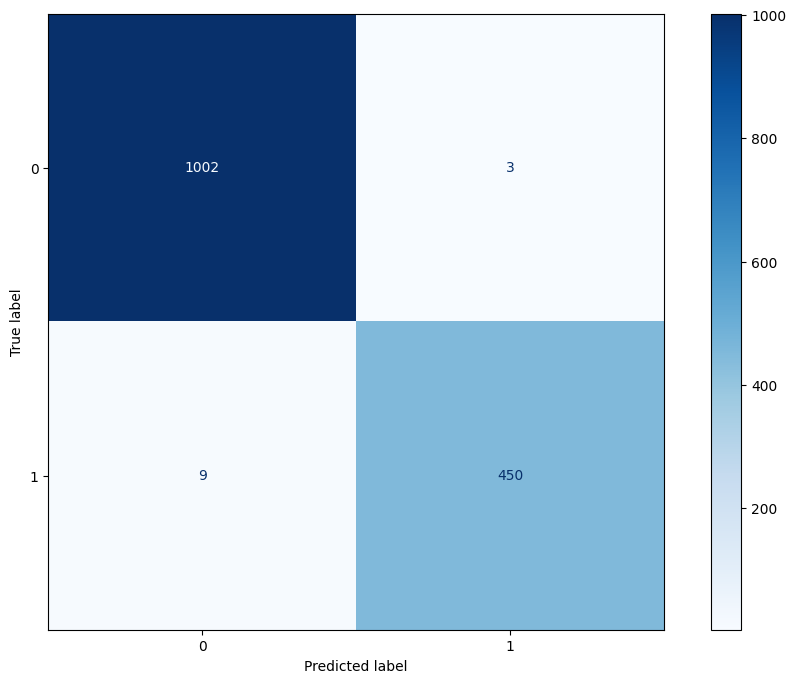

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.show()

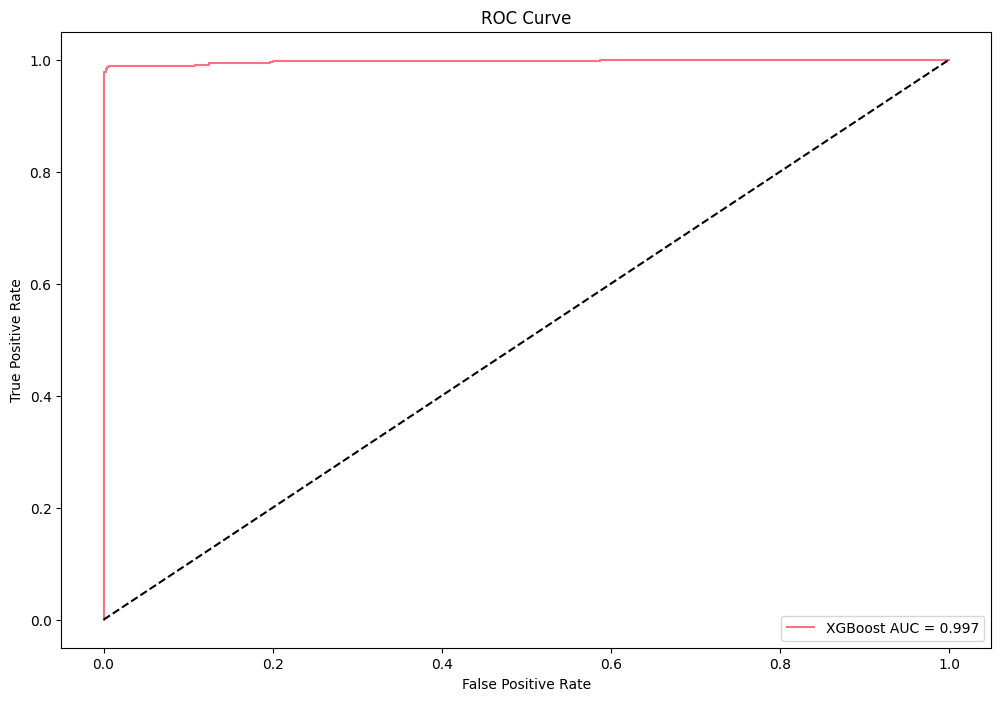

In [17]:
from sklearn.metrics import roc_curve, auc

y_prob_xgb = xgb.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob_xgb)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"XGBoost AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


accuracy: 0.9916 ± 0.0028
precision: 0.9923 ± 0.0036
recall  : 0.9809 ± 0.0091
f1      : 0.9865 ± 0.0046
roc_auc : 0.9992 ± 0.0008


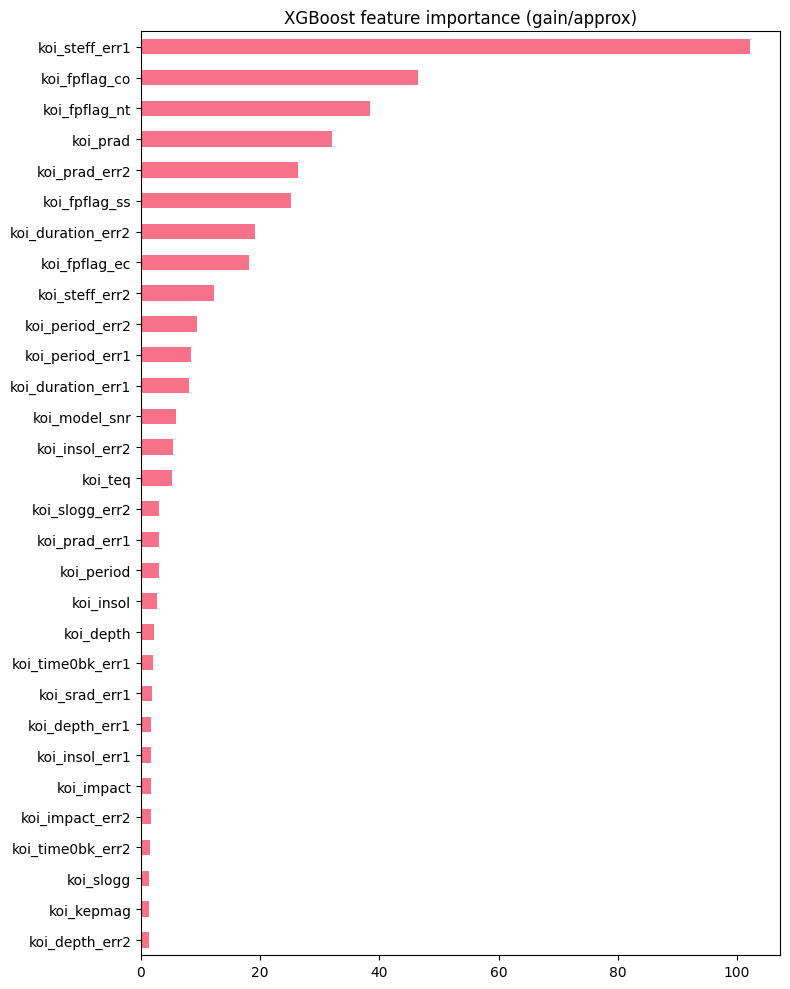

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_validate
from xgboost import XGBClassifier
import joblib

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_validate(xgb, X_train, y_train, cv=cv,
                        scoring=scoring, return_train_score=False, n_jobs=5)

for metric in scoring:
    arr = scores[f'test_{metric}']
    print(f"{metric:8s}: {arr.mean():.4f} ± {arr.std():.4f}")

# Fit on full training set and save model
xgb.fit(X_train, y_train)
joblib.dump(xgb, "models/xgb_full_train.joblib")

# Feature importance (gain)
try:
    booster = xgb.get_booster()
    gain_dict = booster.get_score(importance_type='gain')
    # map possible f0,f1 keys to actual column names if available
    fi_gain = pd.Series(gain_dict).sort_values(ascending=False)
    # if keys are f0..fn, try to map to X columns
    if fi_gain.index.str.startswith('f').all():
        rename_map = {f"f{i}": col for i, col in enumerate(X_train_final.columns)}
        fi_gain.index = fi_gain.index.to_series().map(rename_map)
        
except Exception:
    # fallback: use sklearn style feature_importances_
    fi_gain = pd.Series(xgb.feature_importances_, index=X_train_final.columns).sort_values(ascending=False)

plt.figure(figsize=(8,10))
fi_gain.head(30).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('XGBoost feature importance (gain/approx)')
plt.tight_layout()
plt.savefig('reports/xgb_feature_importance.png')
plt.show()


accuracy: 0.9916 ± 0.0028
precision: 0.9923 ± 0.0036
recall  : 0.9809 ± 0.0091
f1      : 0.9865 ± 0.0046
roc_auc : 0.9992 ± 0.0008


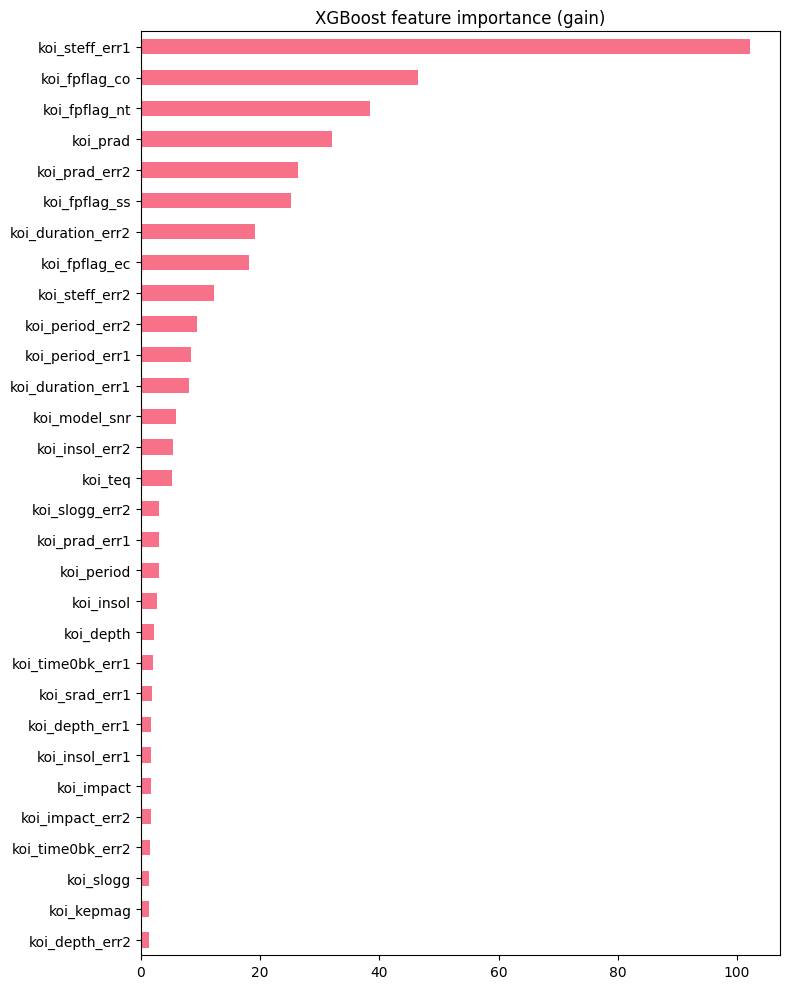

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_validate
from xgboost import XGBClassifier
import joblib

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_validate(xgb, X_train, y_train, cv=cv,
                        scoring=scoring, return_train_score=False, n_jobs=5)

for metric in scoring:
    arr = scores[f'test_{metric}']
    print(f"{metric:8s}: {arr.mean():.4f} ± {arr.std():.4f}")

# Fit on full training set and save model
xgb.fit(X_train, y_train)
joblib.dump(xgb, "models/xgb_full_train.joblib")

# Feature importance (gain)
try:
    booster = xgb.get_booster()
    gain_dict = booster.get_score(importance_type='gain')
    fi_gain = pd.Series(gain_dict).sort_values(ascending=False)

    # Map "f0", "f1"... to actual column names if possible
    if fi_gain.index.str.startswith('f').all():
        rename_map = {f"f{i}": col for i, col in enumerate(X_train_final.columns)}
        fi_gain.index = fi_gain.index.to_series().map(rename_map)

except Exception:
    # fallback: use sklearn style feature_importances_
    fi_gain = pd.Series(xgb.feature_importances_, index=X_train_final.columns).sort_values(ascending=False)

# Plot top features
plt.figure(figsize=(8,10))
fi_gain.head(30).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('XGBoost feature importance (gain)')
plt.tight_layout()
plt.savefig('reports/xgb_feature_importance.png')
plt.show()


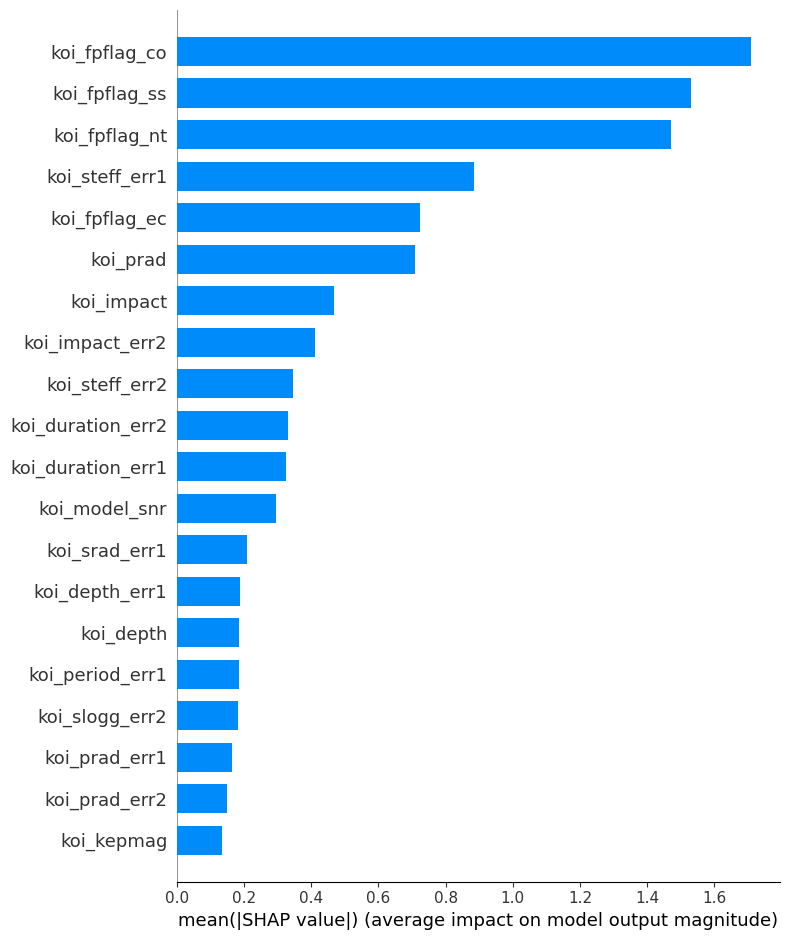

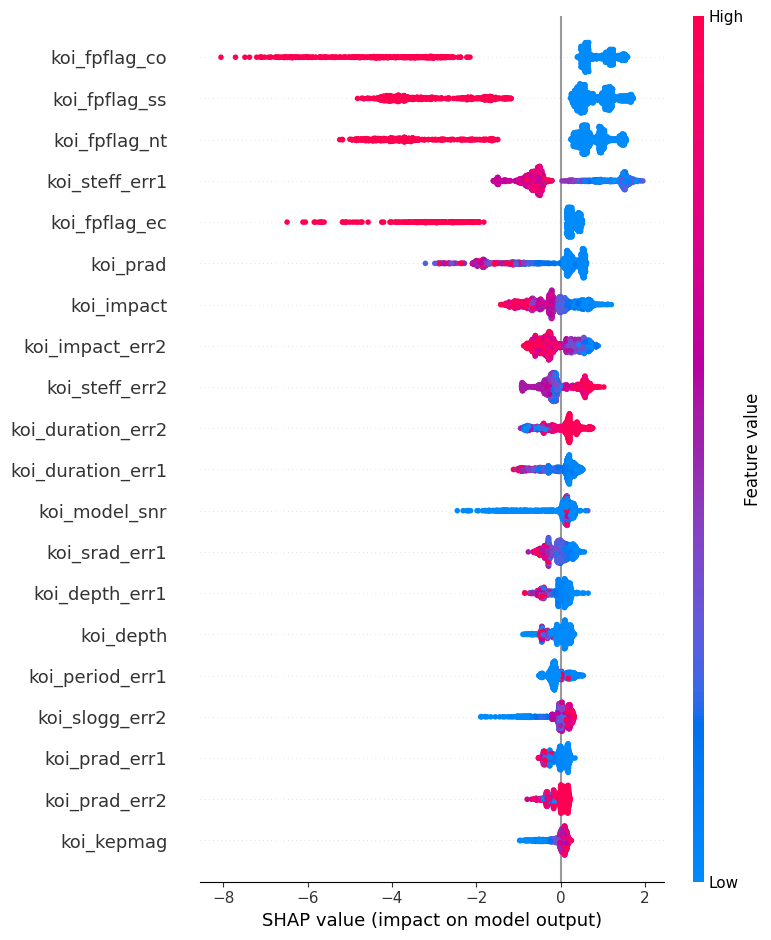

In [20]:
import shap
import matplotlib.pyplot as plt

# Create TreeExplainer for XGBoost
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

# Summary plot (global feature importance with SHAP values)
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Detailed beeswarm plot
shap.summary_plot(shap_values, X_test)

# Force plot for first test sample (local explanation)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])


# ANN

In [21]:
import tensorflow as tf

# Check if GPU is available
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

2025-09-04 22:03:58.271032: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-04 22:03:58.314166: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-04 22:03:59.282587: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Num GPUs Available: 1


In [22]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

I0000 00:00:1757003639.602054   75906 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1767 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [23]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    verbose=1
)

Epoch 1/50


2025-09-04 22:04:00.713395: I external/local_xla/xla/service/service.cc:163] XLA service 0x71e4c4009ea0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-09-04 22:04:00.713417: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2025-09-04 22:04:00.740655: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-09-04 22:04:00.879667: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91200
2025-09-04 22:04:00.968809: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-04 22:04:00.

65/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7732 - auc: 0.8575 - loss: 0.4346

I0000 00:00:1757003644.539729   76056 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7855 - auc: 0.8694 - loss: 0.4177

2025-09-04 22:04:06.641491: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-04 22:04:07.335812: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_47', 116 bytes spill stores, 116 bytes spill loads

2025-09-04 22:04:07.816038: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-04 22:04:08.438713: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning :

74/74 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - accuracy: 0.8782 - auc: 0.9568 - loss: 0.2883 - val_accuracy: 0.9658 - val_auc: 0.9866 - val_loss: 0.1314
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9714 - auc: 0.9905 - loss: 0.1013 - val_accuracy: 0.9761 - val_auc: 0.9913 - val_loss: 0.0983
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9791 - auc: 0.9918 - loss: 0.0827 - val_accuracy: 0.9769 - val_auc: 0.9941 - val_loss: 0.0897
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9801 - auc: 0.9957 - loss: 0.0674 - val_accuracy: 0.9778 - val_auc: 0.9947 - val_loss: 0.0923
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9801 - auc: 0.9959 - loss: 0.0664 - val_accuracy: 0.9795 - val_auc: 0.9949 - val_loss: 0.0929
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9821 - auc: 0.9966 - loss: 0.0576 - val_accuracy: 0.9787 - val_auc: 0.9943 - val_loss: 0.0952
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 

In [24]:
results = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {results[0]:.4f}, Test Accuracy: {results[1]:.4f}, Test AUC: {results[2]:.4f}")

2025-09-04 22:04:19.436734: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-04 22:04:19.962014: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_47', 100 bytes spill stores, 100 bytes spill loads

2025-09-04 22:04:20.535391: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-04 22:04:21.384506: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning :

Test Loss: 0.0597, Test Accuracy: 0.9918, Test AUC: 0.9922


In [25]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step 


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1005
           1       0.99      0.98      0.99       459

    accuracy                           0.99      1464
   macro avg       0.99      0.99      0.99      1464
weighted avg       0.99      0.99      0.99      1464



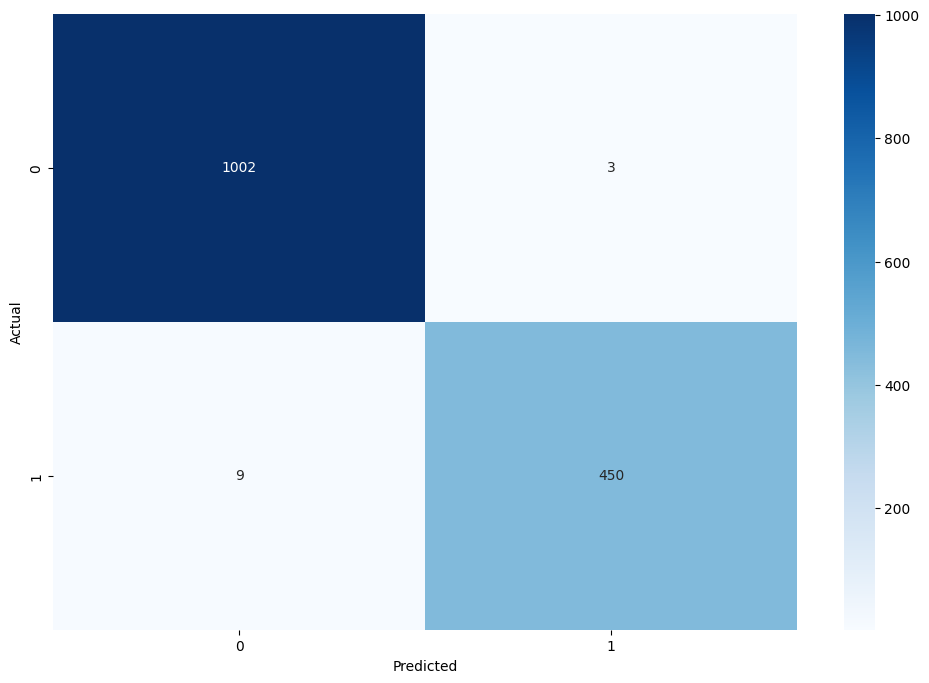

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

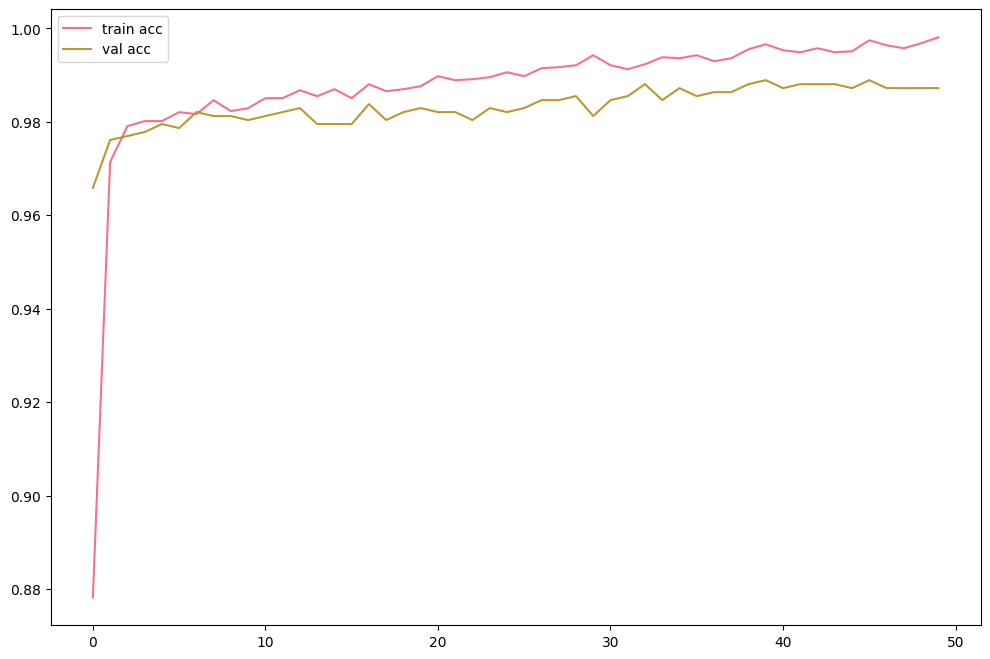

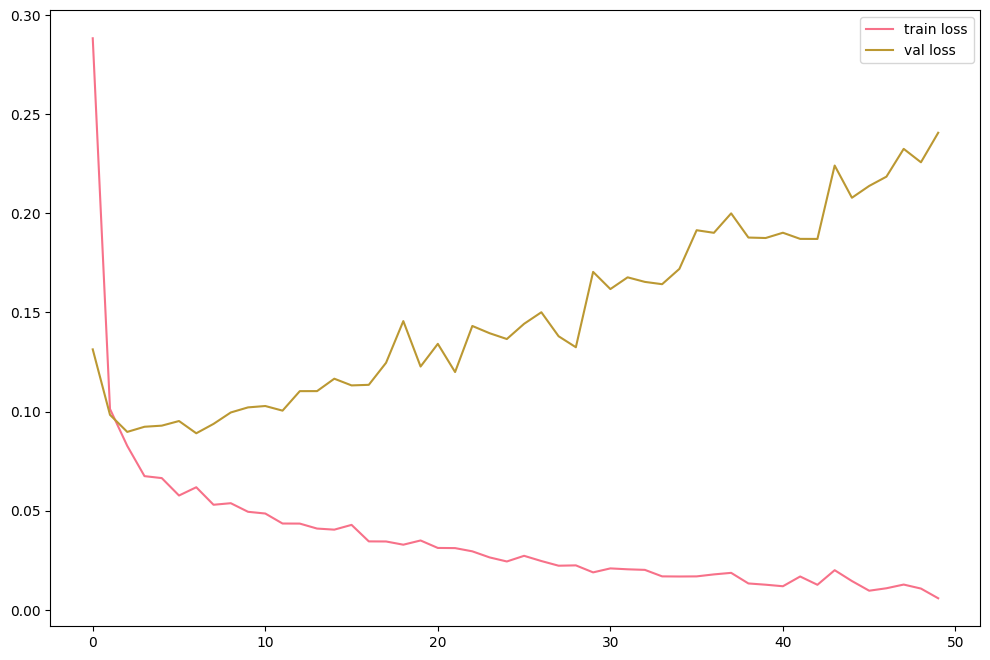

In [27]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


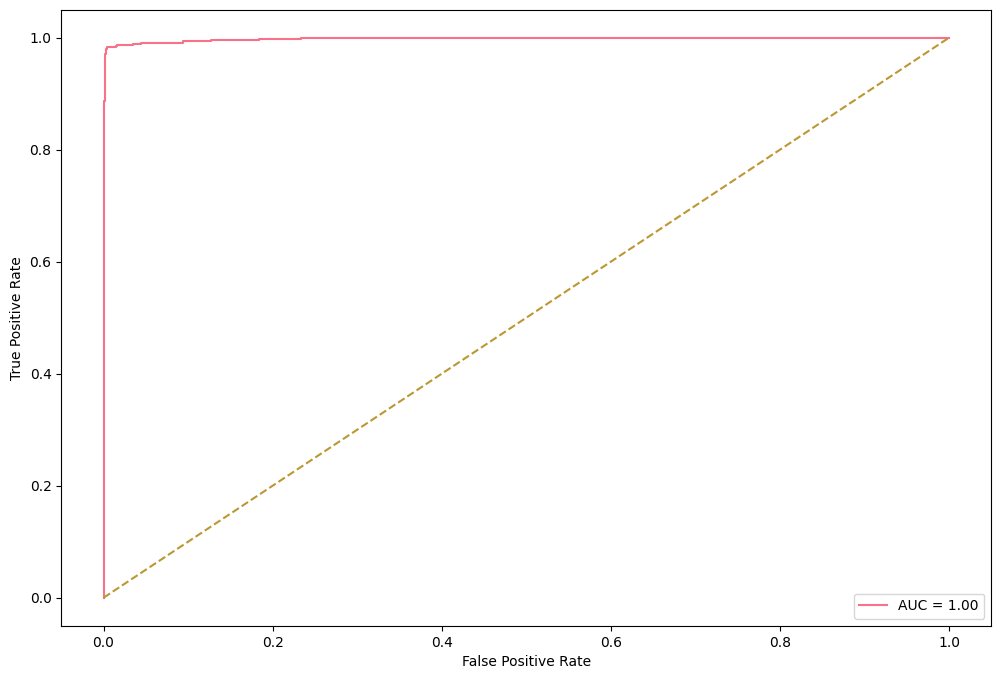

In [28]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

### Optimized ANN (reduces overfitting)

In [29]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers

# Define model
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),

    layers.Dense(128, activation='relu',
                 kernel_regularizer=regularizers.l2(1e-4)),
    layers.Dropout(0.4),

    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l2(1e-4)),
    layers.Dropout(0.3),

    layers.Dense(1, activation='sigmoid')
])

# Compile
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

# Early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [30]:
# Train
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50


2025-09-04 22:04:24.280350: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-04 22:04:24.280399: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-04 22:04:24.280413: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-04 22:04:25.418362: I external/l

150/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8415 - auc: 0.9105 - loss: 0.3634

2025-09-04 22:04:28.106666: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-04 22:04:28.762244: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_559', 28 bytes spill stores, 28 bytes spill loads

2025-09-04 22:04:28.895425: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_559', 24 bytes spill stores, 24 bytes spill loads



183/183 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9305 - auc: 0.9772 - loss: 0.2145 - val_accuracy: 0.9822 - val_auc: 0.9961 - val_loss: 0.0829
Epoch 2/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9762 - auc: 0.9919 - loss: 0.1035 - val_accuracy: 0.9829 - val_auc: 0.9959 - val_loss: 0.0738
Epoch 3/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9786 - auc: 0.9933 - loss: 0.0946 - val_accuracy: 0.9843 - val_auc: 0.9963 - val_loss: 0.0697
Epoch 4/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9788 - auc: 0.9947 - loss: 0.0866 - val_accuracy: 0.9843 - val_auc: 0.9964 - val_loss: 0.0668
Epoch 5/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9807 - auc: 0.9958 - loss: 0.0797 - val_accuracy: 0.9843 - val_auc: 0.9967 - val_loss: 0.0643
Epoch 6/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9802 - auc: 0.9952 - loss: 0.0807 - val_accuracy: 0.9850 - val_auc: 0.9959 - val_loss: 0.0630
Epoch 7/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

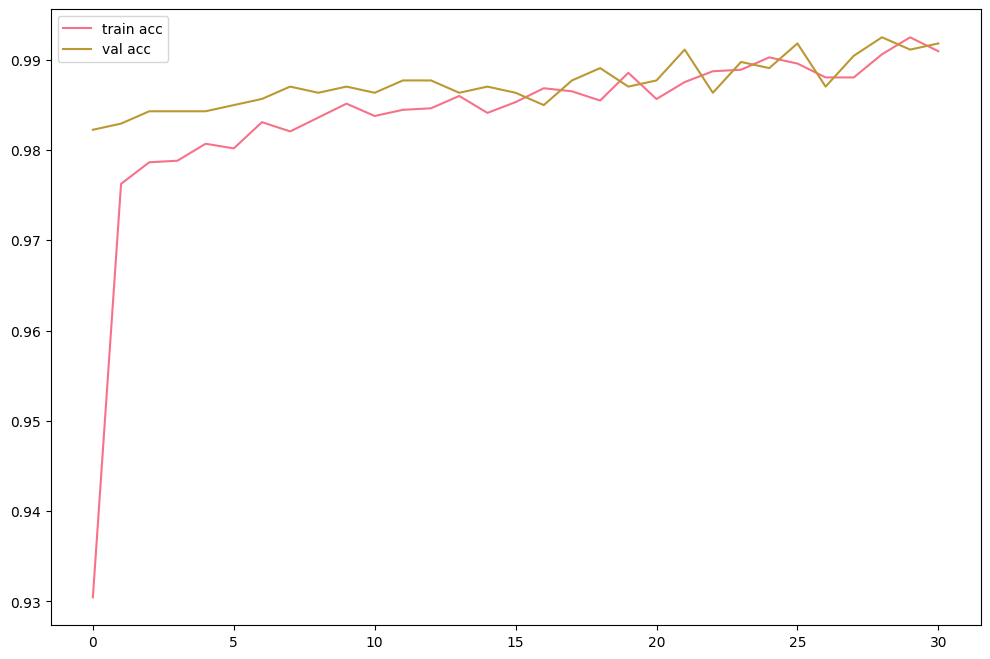

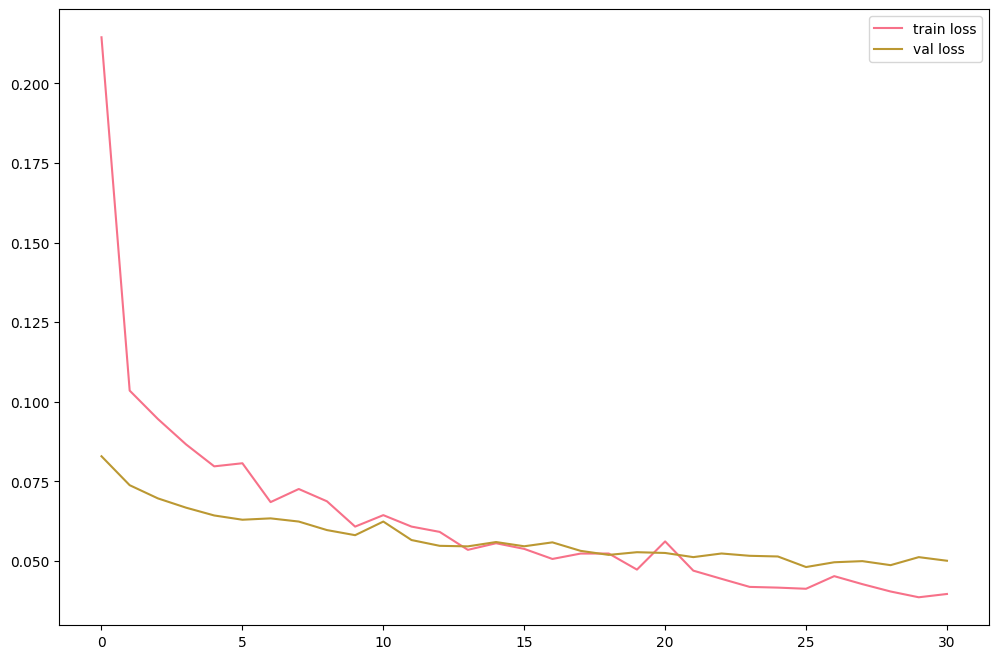

In [31]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

## MlFlow Tracking

In [32]:
import io
import mlflow
import mlflow.sklearn
import mlflow.tensorflow
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tempfile
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# -----------------------------
# 🔹 Replace with your Kepler dataset later
# -----------------------------
X, y = make_classification(n_samples=2000, n_features=20,
                           n_informative=15, n_classes=2,
                           random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# -----------------------------
# 🔹 Helper functions
# -----------------------------


def log_confusion_matrix(y_true, y_pred, name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")

    tmpfile = tempfile.NamedTemporaryFile(suffix=".png", delete=False)
    plt.savefig(tmpfile.name, format="png")
    mlflow.log_image(Image.open(tmpfile.name), f"{name}_confusion_matrix.png")
    plt.close()

def log_training_curves(history, name):
    # Accuracy
    plt.figure(figsize=(6, 4))
    plt.plot(history.history['accuracy'], label="train acc")
    plt.plot(history.history['val_accuracy'], label="val acc")
    plt.legend()
    plt.title("Accuracy")
    tmpfile = tempfile.NamedTemporaryFile(suffix=".png", delete=False)
    plt.savefig(tmpfile.name, format="png")
    mlflow.log_image(Image.open(tmpfile.name), f"{name}_accuracy.png")
    plt.close()

    # Loss
    plt.figure(figsize=(6, 4))
    plt.plot(history.history['loss'], label="train loss")
    plt.plot(history.history['val_loss'], label="val loss")
    plt.legend()
    plt.title("Loss")
    tmpfile = tempfile.NamedTemporaryFile(suffix=".png", delete=False)
    plt.savefig(tmpfile.name, format="png")
    mlflow.log_image(Image.open(tmpfile.name), f"{name}_loss.png")
    plt.close()

# -----------------------------
# 🔹 MLflow Experiment
# -----------------------------
mlflow.set_experiment("kepler_exoplanets")

# -----------------------------
# (A) XGBoost
# -----------------------------
with mlflow.start_run(run_name="XGBoost"):
    xgb = XGBClassifier(
        n_estimators=300,
        max_depth=6,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric="logloss",
        random_state=42
    )
    xgb.fit(X_train, y_train)
    y_pred_xgb = xgb.predict(X_test)

    report = classification_report(y_test, y_pred_xgb, output_dict=True)

    mlflow.log_params(xgb.get_params())
    mlflow.log_metrics({
        "accuracy": report["accuracy"],
        "precision": report["weighted avg"]["precision"],
        "recall": report["weighted avg"]["recall"],
        "f1": report["weighted avg"]["f1-score"]
    })

    log_confusion_matrix(y_test, y_pred_xgb, "xgb")

    input_example = X_test[:5]
    mlflow.sklearn.log_model(xgb, name="model", input_example=input_example)

# -----------------------------
# (B) ANN-basic
# -----------------------------
with mlflow.start_run(run_name="ANN-basic"):
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
    )

    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=50,
        batch_size=64,
        verbose=0
    )

    y_pred = (model.predict(X_test) > 0.5).astype(int)
    report = classification_report(y_test, y_pred, output_dict=True)

    mlflow.log_params({"layers": [128, 64], "dropout": 0.3, "lr": 1e-3})
    mlflow.log_metrics({
        "accuracy": report["accuracy"],
        "precision": report["weighted avg"]["precision"],
        "recall": report["weighted avg"]["recall"],
        "f1": report["weighted avg"]["f1-score"]
    })

    log_confusion_matrix(y_test, y_pred, "ann-basic")
    log_training_curves(history, "ann-basic")

    input_example = X_test[:5]
    mlflow.tensorflow.log_model(model, name="model", input_example=input_example)

# -----------------------------
# (C) ANN-regularized
# -----------------------------
with mlflow.start_run(run_name="ANN-regularized"):
    model = models.Sequential([
        layers.Input(shape=(X_train.shape[1],)),

        layers.Dense(128, activation='relu',
                     kernel_regularizer=regularizers.l2(1e-4)),
        layers.Dropout(0.4),

        layers.Dense(64, activation='relu',
                     kernel_regularizer=regularizers.l2(1e-4)),
        layers.Dropout(0.3),

        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                  loss='binary_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

    early_stop = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )

    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=50,
        batch_size=32,
        callbacks=[early_stop],
        verbose=0
    )

    y_pred = (model.predict(X_test) > 0.5).astype(int)
    report = classification_report(y_test, y_pred, output_dict=True)

    mlflow.log_params({
        "layers": [128, 64],
        "dropout": [0.4, 0.3],
        "lr": 1e-3,
        "l2": 1e-4
    })
    mlflow.log_metrics({
        "accuracy": report["accuracy"],
        "precision": report["weighted avg"]["precision"],
        "recall": report["weighted avg"]["recall"],
        "f1": report["weighted avg"]["f1-score"]
    })

    log_confusion_matrix(y_test, y_pred, "ann-regularized")
    log_training_curves(history, "ann-regularized")

    input_example = X_test[:5]
    mlflow.tensorflow.log_model(model, name="model", input_example=input_example)


2025-09-04 22:04:47.923415: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_942', 8 bytes spill stores, 8 bytes spill loads



13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


### Save ANN

In [33]:
import tensorflow as tf
import os

# Create models directory
os.makedirs("models", exist_ok=True)

# 1. Save in new Keras format (.keras) → Recommended
model.save("models/kepler_ann.keras")

# 2. (Optional) Save in legacy HDF5 format for compatibility
model.save("models/kepler_ann.h5")

# 3. Save in TensorFlow SavedModel format (folder)
model.export("models/kepler_ann_savedmodel")

print("Model saved: .keras, .h5, and SavedModel")


INFO:tensorflow:Assets written to: models/kepler_ann_savedmodel/assets


INFO:tensorflow:Assets written to: models/kepler_ann_savedmodel/assets


Saved artifact at 'models/kepler_ann_savedmodel'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 20), dtype=tf.float32, name='keras_tensor_33')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  125232981291456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  125232980602448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  125232980599808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  125232937462672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  125232937463200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  125232937458272: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model saved: .keras, .h5, and SavedModel


## Register Model

In [34]:
import mlflow

run_id = "f4c62208af324474a5c5006bc33bfca7"  # your ANN-regularized run
model_name = "ANN_Regularized"  # name in Model Registry

# Correct artifact path is "model" (as logged above)
model_uri = f"runs:/{run_id}/model"

result = mlflow.register_model(model_uri, model_name)
print(f"Registered model version: {result.version}")


Successfully registered model 'ANN_Regularized'.
2025/09/04 22:05:18 WARNING mlflow.tracking._model_registry.fluent: Run with id f4c62208af324474a5c5006bc33bfca7 has no artifacts at artifact path 'model', registering model based on models:/m-c26ede2e2d25482bb98d212b008ca65f instead


Registered model version: 1


Created version '1' of model 'ANN_Regularized'.


In [35]:
import mlflow
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# -----------------------------
# Load the registered model
# -----------------------------
model_name = "ANN_Regularized"  # Model Registry name
model_version = 1  # Replace with the actual version in registry

model_uri = f"models:/{model_name}/{model_version}"

# Load TensorFlow model
loaded_tf_model = mlflow.tensorflow.load_model(model_uri)

# -----------------------------
# Make predictions
# -----------------------------
y_pred_prob = loaded_tf_model.predict(X_test)  # Probabilities
y_pred = (y_pred_prob > 0.5).astype(int)       # Convert to 0/1 labels

# -----------------------------
# Evaluate
# -----------------------------
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       189
           1       0.98      0.98      0.98       211

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400

Confusion Matrix:
 [[185   4]
 [  4 207]]
